In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [5]:


# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]



data shape:  (70000, 784)
label shape: (70000,)


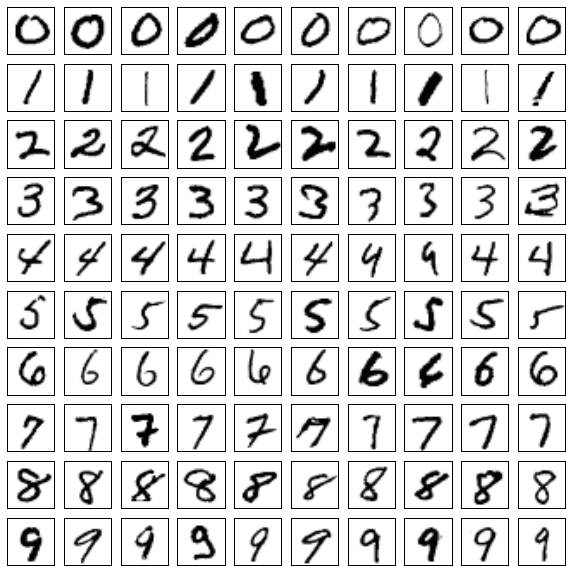

In [3]:
### Problem 1 ###
### STUDENT START ###
def P1(digit_examples=10):
    # Set the plot colormap & size 
    plt.rc('image',cmap="Greys")
    # Set the plot size 
    plt.figure( figsize=(digit_examples, len(np.unique(Y)) ) )
         
    # Loop each of the grid with the digits * digit_examples (10*10) dimenstion      
    for digit in range(len(np.unique(Y))):
        # Extract 10 example for each digit
        examples = X[np.where(Y == digit)[0][:digit_examples]]
        # Generate the elements of an iterator as well as an index number 
        for index, image in enumerate(examples):
            # Setup the subplot in (Digit, col, location)
            plt.subplot(len(np.unique(Y)), digit_examples, digit * digit_examples + index + 1)
            # Reshape the image into a 28 x 28 matrix
            plt.imshow(image.reshape(28,28))
            # Get current ax instance 
            ax = plt.gca() 
            # hide axis lables
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)

### STUDENT END ###

P1(10)

In [86]:
### Problem 2 ###
### STUDENT START ###
def P2(k_values):    
    for k in k_values:
        # Create KNN Classifier and fit it with mini train/test datasets
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(mini_train_data, mini_train_labels)
        
        # Accuracy report on the dev set
        if k != 1:
            print( 'Accuracy for KNN model with %d neighbors is: %0.3f' %(k, clf.score(dev_data, dev_labels))  )
            
        else:
            # Predicted labels for the dev set
            pred_labels = clf.predict(dev_data)
            print('Accuracy for KNN model with %d neighbors is: %0.3f' %(k, clf.score(dev_data, dev_labels)) )
            print(classification_report(dev_labels, pred_labels, digits=3) )
             
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]

P2(k_values)

#ANSWER: Among all digits, the number 9 is the most difficult one 
# due to its lowerest precision (0.777) and F1 score (0.798).



Accuracy for KNN model with 1 neighbors is: 0.885
             precision    recall  f1-score   support

        0.0      0.930     0.969     0.949        96
        1.0      0.909     0.985     0.945       132
        2.0      0.923     0.840     0.880       100
        3.0      0.907     0.860     0.883       114
        4.0      0.919     0.731     0.814        93
        5.0      0.903     0.894     0.898        94
        6.0      0.905     0.941     0.922       101
        7.0      0.829     0.948     0.885        97
        8.0      0.935     0.758     0.837        95
        9.0      0.704     0.885     0.784        78

avg / total      0.891     0.885     0.884      1000

Accuracy for KNN model with 3 neighbors is: 0.887
Accuracy for KNN model with 5 neighbors is: 0.885
Accuracy for KNN model with 7 neighbors is: 0.884
Accuracy for KNN model with 9 neighbors is: 0.869


In [8]:
### Problem 3 ###
def P3(train_sizes, accuracies):
### STUDENT START ###
    # Create KNN classfier
    clf = KNeighborsClassifier(n_neighbors=1)
  
    # Print train_sizes, the accuracy of KNN (k=1), and amount of time 
    print("train_sizes\tAccuracy\tTime")
    for size in train_sizes:
        # initial time
        t0 = time.time()
        clf = clf.fit(train_data[:size], train_labels[:size])
        accuracy = clf.score(dev_data, dev_labels)
        print('%d \t\t %.3f \t\t %.3f ' %(size, accuracy, time.time() - t0))
        accuracies.append(accuracy)    
    return accuracies
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

train_sizes	Accuracy	Time
100 		 0.720 		 0.192 
200 		 0.786 		 0.392 
400 		 0.841 		 0.808 
800 		 0.884 		 1.681 
1600 		 0.902 		 3.348 
3200 		 0.926 		 6.152 
6400 		 0.937 		 12.452 
12800 		 0.959 		 26.850 
25000 		 0.970 		 67.558 


[0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

Predicted accuracy with the training size of 60000: 1.243
Predicted accuracy after log10 with the training size of 60000: 1.034


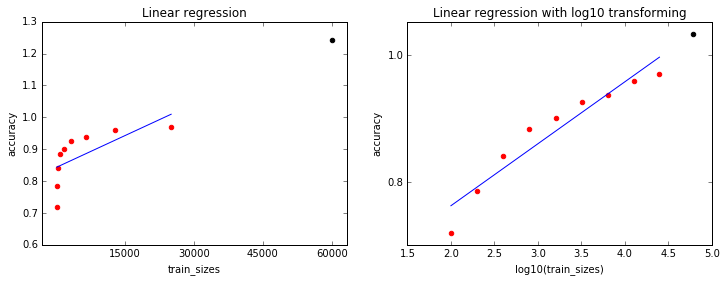

In [9]:
### Problem 4 ###
def P4():
### STUDENT START ###
    # Build regress model
    X4 = np.array(train_sizes).reshape((-1,1))
    y4 = np.array(accuracies).reshape((-1,1))
    regression_model = LinearRegression()
    regression_model.fit(X4, y4)
    
    # Print the prediction of linear model when the training size n=60000
    print( 'Predicted accuracy with the training size of %d: %.3f' %(60000, regression_model.predict(60000)) )
    # Show the scatter plot between train_sizes and accuracy
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(1, 2, 1)
    plt.setp(ax, xticks=(15000,30000,45000,60000))
    plt.plot(X4, regression_model.predict(X4))
    plt.scatter(X4, y4, color='red')
    plt.scatter(60000, regression_model.predict(60000), color='black')
    plt.ylabel("accuracy")
    plt.xlabel("train_sizes")
    plt.title('Linear regression')
    
    # With a log10 transforming
    regression_model.fit( np.log10(X4), y4)
    print('Predicted accuracy after log10 with the training size of %d: %.3f' %(60000, regression_model.predict(np.log10(60000) ) ) )
    # Show the scatter plot after log10 transformed between train_sizes and accuracy
    ax = plt.subplot(1, 2, 2)
    plt.setp(ax, yticks=(0.6, 0.8, 1.0, 1.2, 1.4))
    plt.plot( np.log10(X4), regression_model.predict( np.log10(X4) )  )
    plt.scatter(np.log10(X4), y4, color='red')
    plt.scatter(np.log10(60000), regression_model.predict(np.log10(60000)), color='black')
    plt.ylabel("accuracy")
    plt.xlabel("log10(train_sizes)")
    plt.title('Linear regression with log10 transforming')     
### STUDENT END ###


P4()

# When the traninng size is 6000, the linear regression model predicts the corresponding accuracy to be about 1.243. 
# This is not reasonable because the value itself is larger than 100%. The reason for this is due to the nonlinear relationship 
# between train_sizes and observed accuracies. We observe that the train_size exceed size 10000, the accuracy will almost reach a saturation.
# Therefore, if we can not directly apply the linear model. To fix this problem, we consider log10 (or log) transforming for 
# the given train_sizes and then fit newly transformed data into the linear model. This will make the prediction more 
# reasonable as show in above right figure.

In [10]:
### Problem 5 ###
def P5():

### STUDENT START ###
    # Define a 1-NN model and fit the dev data
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(mini_train_data, mini_train_labels)
    pred_labels = clf.predict(dev_data)
    
    # Print the confusion matrix 
    CM = confusion_matrix(dev_labels, pred_labels)
    print( 'Confusion matrix for consfused pairs of digits:')
    print(CM)
    # Create a dictionary with key:value = (row,col) : mismatched number of pairs of digits
    confusion_dict = {}
    for row in range(0,CM.shape[0]):
        for col in range(0,CM.shape[1]):
            if row != col:
                confusion_dict[(row,col)] = CM[row][col]
    # Extract top 3 most confused pairs of digits 
    top_confused = sorted(confusion_dict.items(),key=lambda x:x[1], reverse=True)[:3]
    # Print 3 most confused pairs 
    print('Top 3 confused [(TRUE, PREDICTION), counts]:', top_confused)
    
### STUDENT END ###

P5()


Confusion matrix for consfused pairs of digits:
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Top 3 confused [(TRUE, PREDICTION), counts]: [((4, 9), 14), ((5, 3), 9), ((9, 4), 9)]


True digit is : 3.0


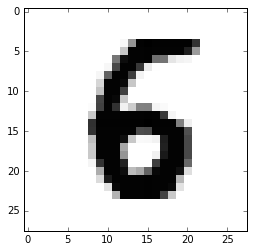

True digit is : 5.0


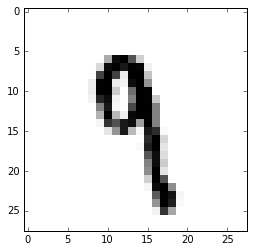

True digit is : 5.0


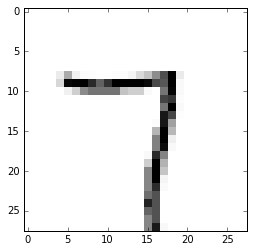

True digit is : 6.0


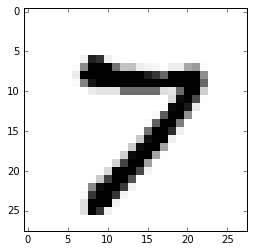

True digit is : 8.0


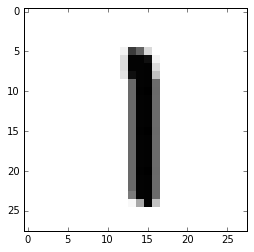

In [163]:
########################### problem (5), Mistakes examples#######################
# Show several mistake examples 
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

neigh1_dev = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                              metric='minkowski', n_neighbors=2, p=2, weights='uniform')

neigh1_dev.fit(mini_train_data, mini_train_labels)
dev_predicted_labels = neigh1_dev.predict(dev_data)
wrong_prediction = (dev_predicted_labels != dev_labels)
#print(wrong_prediction)

i = 0
while i < 50:
    if (wrong_prediction[i] == 1): 
        print("True digit is :", dev_labels[i])
        g = np.reshape(X[i]/255, (-1, 28))
        plt.imshow(g, cmap='Greys',  interpolation='nearest')
        plt.show()
    i = i + 1


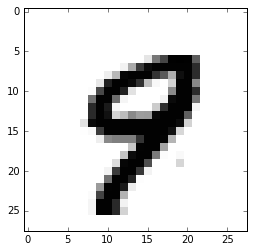

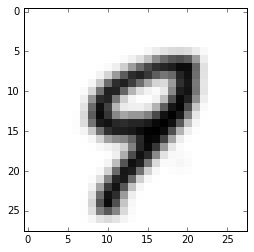

C:\Users\syc\Anaconda3\lib\site-packages\ipykernel\__main__.py:57: RuntimeWarning: overflow encountered in ubyte_scalars


In [119]:
########################### problem (6), Gaussian filter preprocessing#######################


# Show several mistake examples 
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

# My Gaussian Blur Filter
# [[1/16, 1/8, 1/16],
#   [1/8, 1/4, 1/8],
#  [1/16, 1/8, 1/16]]
#

g = np.reshape(X[0]/255, (-1, 28))

g_new = [[0 for i in range(28)] for j in range(28)]

for i in range(0, 28):
    for j in range(0, 28):
        if (i == 0) or (i == 27) or (j == 0) or (j == 27):
            g_new[i][j] = g_new[i][j]
        else:
            g_new[i][j] = (g[i-1][j-1] + g[i-1][j+1] + g[i+1][j+1] + g[i+1][j-1])/16 + (g[i-1][j] + g[i+1][j] + g[i][j+1] + g[i][j-1])/8 + g[i][j]/4
            
# Display blur effect
plt.imshow(g, cmap='Greys',  interpolation='nearest')
plt.show()
plt.imshow(g_new, cmap='Greys',  interpolation='nearest')
plt.show()


# Define blur function for each digit data, input a vector of original digit,
# output a vector of blur digit

def blur_digit(oneD_Rep):
    
    g = np.reshape(oneD_Rep, (-1, 28))
    g_new = [[0 for i in range(28)] for j in range(28)]

    for i in range(0, 28):
        for j in range(0, 28):
            if (i == 0) or (i == 27) or (j == 0) or (j == 27):
                g_new[i][j] = g_new[i][j]
            else:
                g_new[i][j] = (g[i-1][j-1] + g[i-1][j+1] + g[i+1][j+1] + g[i+1][j-1])/16 + (g[i-1][j] + g[i+1][j] + g[i][j+1] + g[i][j-1])/8 + g[i][j]/4

    # Write 2D into 1D 
    blur_data = [0]*784
    for i in range(0, 28):
        for j in range(0, 28):
            blur_data[i*28 + j] = g_new[i][j]
    
    return blur_data

#    preprocess the training data but not the dev data
#    train_data = X[:60000]

X_TrainBlur = []
for i in range(0, 60000):
    X_TrainBlur.append(blur_digit(X[i]))

#    preprocess the dev data but not the training data
#    dev_data = X[60http://localhost:8888/notebooks/%20Project%201%20Digit%20Classification%20with%20KNN%20and%20Naive%20Bayes.ipynb#000:61000]

X_DevBlur = []
for i in range(60000, 61000):
    X_DevBlur.append(blur_digit(X[i]))

#    preprocess both training and dev data
#    train_dev_data = X[:61000]            
   
X_TrainDevBlur = []
for i in range(0, 61000):
    X_TrainDevBlur.append(blur_digit(X[i]))


In [120]:
###### Show blured data for three ways############ I will show data from previous saved ones. I don't want re-run since time-consuming.
print(X_TrainBlur[59999])
print(X_DevBlur[999])
print(X_TrainDevBlur[60199])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.125, 8.8125, 24.9375, 32.75, 20.3125, 4.8125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 3.375, 21.25, 13.875, 62.125, 77.3125, 48.875, 21.8125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 5.1

In [13]:
########################### problem (7), BinaryNB, MultinaryNB #######################
# Fit a Naive Bayes classifier and report accuracy on the dev data.


# Show several mistake examples 
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

#### Binary Class ########

threshold = 127.0
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1

clf7_Binary = BernoulliNB(alpha=1)
clf7_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy: ', clf7_Binary.score(binarized_dev_data, dev_labels))

#### Trinary Class, Uniform partition ########

threshold1 = 85.0
threshold2 = 170.0
trinarized_X_Train = np.array(train_data)
trinarized_X_Train[trinarized_X_Train <= threshold1] = 0
trinarized_X_Train[np.logical_and(trinarized_X_Train  > threshold1, trinarized_X_Train <= threshold2)] = 1
trinarized_X_Train[trinarized_X_Train  > threshold2] = 2

trinarized_dev_data = np.array(dev_data)
trinarized_dev_data[trinarized_dev_data <= threshold1] = 0
trinarized_dev_data[np.logical_and(trinarized_dev_data  > threshold1, trinarized_dev_data <= threshold2)] = 1
trinarized_dev_data[trinarized_dev_data  > threshold2] = 2

clf7_Trinary = MultinomialNB(alpha=1)
clf7_Trinary.fit(trinarized_X_Train, train_labels)
print('Trinary accuracy: ', clf7_Trinary.score(trinarized_dev_data, dev_labels))

# Adding completely uninform feature (at here we do) will decrease test accuracy.
# Adding informative features will increase accuracy. A Naive Bayes classifier needs
# a alot of samples that's logarithmic in the number of features, so at some point
# adding good features should start decreasing accuracy. Another important
# thing is that using too many features may introduce overfitting problem which 
# decrease accuracy.


Binary accuracy:  0.83
Trinary accuracy:  0.818


In [239]:
########################### problem (8), Finding optimal alpha #######################

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

clf8_opt = GridSearchCV(BernoulliNB(), alphas)
clf8_opt.fit(binarized_X_Train, train_labels)
print('Binary accuracy with optimal alpha: ', clf8_opt.score(binarized_dev_data, dev_labels))
print('Best alpha in CV is ', clf8_opt.best_params_['alpha'])

#### Binary Class accuract with alpha = 0

clf8_Binary = BernoulliNB(alpha=0.0)
clf8_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy with alpha zero: ', clf8_Binary.score(binarized_dev_data, dev_labels))

# Since divid by zero issue, the accuracy rate decrease a lot 
# when alpha is exact 0 


C:\Users\syc\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\syc\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\syc\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


Binary accuracy with optimal alpha:  0.839
Best alpha in CV is  0.0001
Binary accuracy with alpha zero:  0.101


C:\Users\syc\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [76]:
############################ problem (9), Finding parameters to have better classifier #######################

# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


#### Gaussian distribution Class ########

clf9_Gauss = GaussianNB()
clf9_Gauss.fit(train_data, train_labels)
print('Gaussian NB accuracy: ', clf9_Gauss.score(dev_data, dev_labels))

#### Gaussian distribution Class modification########
# Method 1, binarized_X_Train in Gaussian
# Adjuting threshold value
threshold = 252.5
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

#Using binarized data as train data 
clf9_GaussFix = GaussianNB()
clf9_GaussFix.fit(binarized_X_Train, train_labels)
print('Gaussian NB Fix accuracy by threshold: ', clf9_GaussFix.score(dev_data, dev_labels))

# Method 2, Adjust mean and variance first

def P9():
    clf = GaussianNB()
    clf.fit(train_data, train_labels)
    return clf

gnb = P9()
# search in grid values composed by mean and variance
# Adjust mean, find folloing value is best for signla between 0 and 350
gnb.theta_ += 20
# Adjust variance, find folloing value is best for signla between 0 and 350 
gnb.sigma_ += 300
print('Gaussian NB Fix accuracy by varaince and mean: ', gnb.score(dev_data, dev_labels) )
### STUDENT END ###

gnb = P9()


#### Binary Class ########

threshold = 127.0
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1

binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1

clf9_Binary = BernoulliNB(alpha=1)
clf9_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy: ', clf9_Binary.score(binarized_dev_data, dev_labels))



Gaussian NB accuracy:  0.557
Gaussian NB Fix accuracy by threshold:  0.724
Gaussian NB Fix accuracy by varaince and mean:  0.84
Binary accuracy:  0.861


In [7]:
######## problem (9), Adding Gaussian Noise to Data #####################
# Because GaussianNB is more suitable for data with gaussian distribution
# At this part, we will try to add gaussian noise to see learning correction rate 
# improvement 

# Tranformation:  Add white noises to train and dev data before training
gnb9GN = GaussianNB()
best_sigma = 0.3 # obtain by try and error for sigma between 0 and 5
train_data_n = train_data + np.random.normal(0,best_sigma,train_data.shape)
dev_data_n = dev_data + np.random.normal(0,best_sigma,dev_data.shape)
gnb9GN.fit(train_data_n, train_labels)
print('Gaussian NB Fix by adding white noises: %.3f' %(gnb9GN.score(dev_data_n, dev_labels)))




Gaussian NB Fix by adding white noises: 0.815


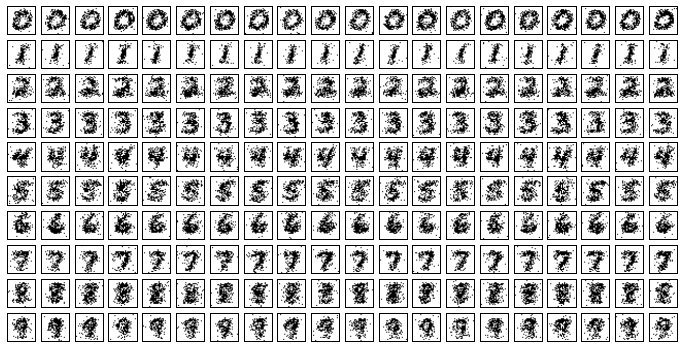

In [117]:
############################ problem (10), Generate digits #####################
#  Compare to the original one, much blur 
def P10(digit_examples):

### STUDENT START ###
    BinomialNB_model = BernoulliNB(binarize=0.5)
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    probs = np.exp(BinomialNB_model.feature_log_prob_)
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(12, 6), dpi=X.shape[1])
    # For each digit from 0 to 9
    for i in range(len(np.unique(Y))):
        # Create a ndarray with the features of digit_examples
        # For each of the "digit_examples" examples
        for j in range(digit_examples):
            # Create subplot with pixel value 0 or 1 by comparing random generated numbers
            example = np.where(probs[i,:]>np.random.rand(X.shape[1]), 1,0)
            # subplots
            plt.subplot(len(np.unique(Y)), digit_examples, i * digit_examples + j + 1)
            # Hide tickmarks and scale
            ax = plt.gca()
            ax.axes.get_xaxis().set_visible(False)
            ax.axes.get_yaxis().set_visible(False)
            # Plot the digit
            digit = example.reshape((28,28))
            plt.imshow(digit)
### STUDENT END ###

P10(20)

p(pred) <= 0.500000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.900000000000000    total =  44    accuracy = 0.386
p(pred) <= 0.999000000000000    total =  71    accuracy = 0.521
p(pred) <= 0.999990000000000    total =  68    accuracy = 0.529
p(pred) <= 0.999999900000000    total =  57    accuracy = 0.702
p(pred) <= 0.999999999000000    total =  60    accuracy = 0.700
p(pred) <= 0.999999999990000    total =  61    accuracy = 0.705
p(pred) <= 0.999999999999900    total =  50    accuracy = 0.720
p(pred) <= 1.000000000000000    total = 589    accuracy = 0.935


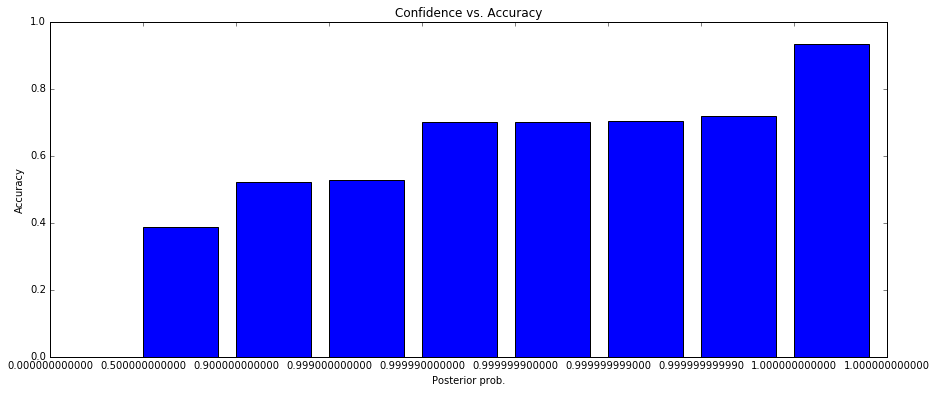

In [116]:
######## Problem 11 approach 1 ################## 
# total number of samples at each bucket depends on predicted probability 


def P11(buckets, correct, total):
    
### STUDENT START ###
    # Create a Binomial NB model
    BinomialNB_model = BernoulliNB(alpha=1, binarize=0.5)
    # Fit it with the mini training set
    BinomialNB_model.fit(mini_train_data, mini_train_labels)
    # Predict labels and probabilities of dev set
    dev_pred_labels = BinomialNB_model.predict(dev_data)
    dev_pred_probs = BinomialNB_model.predict_proba(dev_data)
    # Define some aux variables: buckets_show and acc_show (used to display it)
    buckets_show = list(buckets)
    # Initial value for first bucket 
    buckets_show.insert(0, 0.)
    # Accuracy for each bucket 
    acc_show = [0.]*len(buckets)
    # For every bucket 
    for i in range(1, len(buckets) + 1):
        bucket_label = np.zeros(dev_pred_labels.shape[0])
        num_correct = 0
        num_total = 0
        # For every prediction 
        for j in range(dev_pred_probs.shape[0]):
            # Search the maximum posterior probability 
            prob = dev_pred_probs[j, dev_pred_probs[j].argmax()]
            # If that maximum posterior is inside the current bucket, take it into account
            bucket_label[j] = np.where((prob <= buckets_show[i]) & (prob > buckets_show[i - 1]), 1, 0)
            # If posterior was within the current bucket for that item
            if bucket_label[j] == 1:
                # increase count of total
                num_total +=1
                # If prediction incorrect
                if dev_pred_labels[j] == dev_labels[j]:
                    # increase count of correct
                    num_correct += 1
        # Count total and correct cases for each particular item
        correct[i - 1] = num_correct
        total[i - 1] = num_total
        # Update accuracy to show 
        if (total[i- 1] > 0): acc_show[i - 1] = correct[i - 1] / total[i - 1]
        
    
    # Posterior vs. Accuracy bar chart 
    buck = ["{:.12f}".format(i) for i in buckets_show]
    plt.figure(figsize=(15,6))
    fig = plt.bar(range(len(buckets)), acc_show)
    plt.title('Confidence vs. Accuracy')
    plt.xlabel('Posterior prob.')
    plt.ylabel('Accuracy')
    ax = plt.gca()
    ax.set_xticklabels(buck)              
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.15f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy) )



p(pred) <= 0.500000000000000    total = 125    accuracy = 0.336
p(pred) <= 0.900000000000000    total = 125    accuracy = 0.592
p(pred) <= 0.999000000000000    total = 125    accuracy = 0.656
p(pred) <= 0.999990000000000    total = 125    accuracy = 0.664
p(pred) <= 0.999999900000000    total = 125    accuracy = 0.512
p(pred) <= 0.999999999000000    total = 125    accuracy = 0.536
p(pred) <= 0.999999999990000    total = 125    accuracy = 0.584
p(pred) <= 0.999999999999900    total = 125    accuracy = 0.256


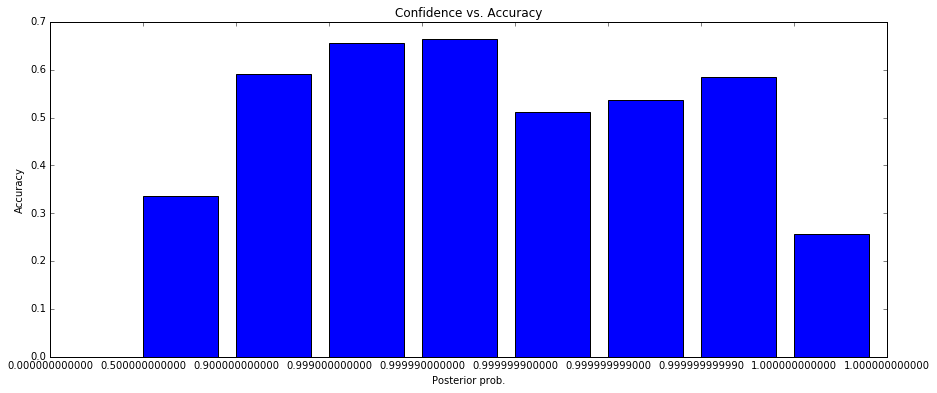

In [31]:

######## Problem 11 approach 2 ##################
#How would you characterize the calibration for the Naive Bayes model?
# # total number of samples at each bucket uniform is same 

mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

threshold = 127
binarized_X_Train = np.array(train_data)
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1
binarized_dev_data = np.array(dev_data)
binarized_dev_data[binarized_dev_data <= threshold] = 0
binarized_dev_data[binarized_dev_data  > threshold] = 1
#Using train data to fit classifier

clf11_Binary = BernoulliNB(alpha=1.0)
clf11_Binary.fit(binarized_X_Train, train_labels)

# Get score for each dev data from predict_proba
Repeition = 1000
scores = [0] * Repeition
for i in range(0, Repeition):
    predict_digit11 = clf11_Binary.predict(binarized_dev_data[i].reshape(1, -1))
    prob = clf11_Binary.predict_proba(binarized_dev_data[i].reshape(1, -1))
    scores[i] = prob[0][int(predict_digit11)]     

    
# ranking test data by score

sorted_scores = np.sort(scores)        
#print(sorted_scores[1])    

# Put into bucket to update each bucket counter to obtain calibrated probability

# Define some aux variables: buckets_show and acc_show (used to display it)
buckets_show = list(buckets)
# Initial value for first bucket 
buckets_show.insert(0, 0.)
# Accuracy for each bucket 
acc_show = [0.]*len(buckets)

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0] * 8
total = [125] * 8

start = 0
for i in range(len(buckets)-1):
    accuracy = 0.0
    count = 0
     
    while ((sorted_scores[start] < buckets[i + 1]) and  (sorted_scores[start] >= buckets[i])):
        count = count + 1
        start = start + 1
    correct[i] = count
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
    table = {'p(pred)': buckets[i+1], 'total': total[i], 'accuracy': accuracy}
    acc_show[i + 1] = accuracy
    print('p(pred) <= %.15f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy) ) 
    
# Posterior vs. Accuracy bar chart 
buck = ["{:.12f}".format(i) for i in buckets_show]
plt.figure(figsize=(15,6))
fig = plt.bar(range(len(buckets)), acc_show)
plt.title('Confidence vs. Accuracy')
plt.xlabel('Posterior prob.')
plt.ylabel('Accuracy')
ax = plt.gca()
ax.set_xticklabels(buck)   
   
   
    
# Given a test sample, the score represented by the predict_proba are typically extreme:
# for most sample, the score is near 1 (score(x) > Prob(feature|x)) or near 0 (score(x) < Prob(feature|x)).
# However, they are order-preserving, i.e., score(x) < score(y) then Prob(feature|x) < Prob(feature|y)
# Based on following table, we then estimate the corrected probability
# that sample x belongs to a feature class as the fraction of training examples
# in the bin that actually belong to such feature.
    

In [108]:
######## Problem 12 Part I v2 ##################
import math

mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

# Transform all data to a new feature space 

#weight for additional pixels
beta = 1.0

def transform_digit(oneD_Rep):
    
    g = np.reshape(oneD_Rep, (-1, 28))
    g_new = [[0 for i in range(28)] for j in range(28)]

    for i in range(0, 28):
        for j in range(0, 28):
            if (i != 0) or (j != 0):
                g_new[i][j] = g[i][j]             
            else:
                # Summation of row 
                if (i==0):
                    sum_row = 0
                    for k in range(0, 28):
                        sum_row = sum_row + beta * g[k][j]
                    g[0][j] = sum_row
                # Summation of column     
                if (j==0):
                    sum_column = 0
                    for k in range(0, 28):
                        sum_column = sum_column + beta * g[i][k]
                    g[i][0] = sum_column               
                
                               
                
    # Write 2D into 1D 
    transform_data = [0]*784
    for i in range(0, 28):
        for j in range(0, 28):
            transform_data[i*28 + j] = g_new[i][j]
    
    return transform_data


#Transofrming the train data

T_train_data = []
for i in range(0, 1000):
    T_train_data.append(transform_digit(X[i]))
    
#Transofrming the test data   
    
T_test_data = []
for i in range(0, 500):
    T_test_data.append(transform_digit(X[61000 + i]))
         
  
print(T_train_data[999])

print(T_test_data[499])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 191, 113, 114, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 246, 252, 252, 253, 243, 193, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 85, 252, 252, 252, 253, 252, 252, 115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 85, 252, 233, 223, 237, 252, 252, 242, 91, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 221, 84, 0, 50, 237, 252, 252, 252, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111, 110, 0, 0, 48, 229, 253, 253, 192, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 53, 224, 252, 253, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 169, 252, 253, 167, 0

In [109]:

######## Problem 12 Part II ##################
# Using new feature space data to train model 

threshold = 113
binarized_T_Train = np.array(T_train_data)
binarized_T_Train[binarized_T_Train <= threshold] = 0
binarized_T_Train[binarized_T_Train  > threshold] = 1

binarized_T_test = np.array(T_test_data)
binarized_T_test[binarized_T_test <= threshold] = 0
binarized_T_test[binarized_T_test  > threshold] = 1

train_labels = Y[:1000]
test_labels = Y[61000: 61500]
clf12_T_Binary = BernoulliNB(alpha=1)
#clf12_T_Binary = GaussianNB()
clf12_T_Binary.fit(binarized_T_Train, train_labels)
print('Binary accuracy after transformation: ', clf12_T_Binary.score(binarized_T_test, test_labels))



#### Binary Class ########

threshold = 127
binarized_X_Train = np.array(train_data[0:1000])
X_Train = np.array(train_data[0:1000])
binarized_X_Train[binarized_X_Train <= threshold] = 0
binarized_X_Train[binarized_X_Train  > threshold] = 1


binarized_test_data = np.array(test_data[:500])
binarized_test_data[binarized_test_data <= threshold] = 0
binarized_test_data[binarized_test_data  > threshold] = 1

clf12_Binary = BernoulliNB(alpha=1)

clf12_Binary.fit(binarized_X_Train, train_labels)
print('Binary accuracy without transformation: ', clf12_Binary.score(binarized_test_data, test_labels))





Binary accuracy after transformation:  0.846
Binary accuracy without transformation:  0.834


In [114]:
######## Problem 12 ##################
# Using following program to turn the best weight function that maximixes correct score difference between
# transfored and original data 
import math
# Show several mistake examples 
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# transform function with weight parameter by adding row and column sum

def transform_digit(oneD_Rep, beta):
    
    g = np.reshape(oneD_Rep, (-1, 28))
    g_new = [[0 for i in range(28)] for j in range(28)]

    for i in range(0, 28):
        for j in range(0, 28):
            if (i != 0) or (j != 0):
                g_new[i][j] = g[i][j]             
            else:
                # Summation of row 
                if (i==0):
                    sum_row = 0
                    for k in range(0, 28):
                        sum_row = sum_row + beta * g[k][j]
                    g[0][j] = sum_row
                # Summation of column     
                if (j==0):
                    sum_column = 0
                    for k in range(0, 28):
                        sum_column = sum_column + beta * g[i][k]
                    g[i][0] = sum_column               
                
                               
                
    # Write 2D into 1D 
    transform_data = [0]*784
    for i in range(0, 28):
        for j in range(0, 28):
            transform_data[i*28 + j] = g_new[i][j]
    
    return transform_data

 


betas = np.arange(0.1, 1.25, 0.2)
accuracies_T = np.zeros(betas.shape) 
accuracies = np.zeros(betas.shape)
accuracies_diff = np.zeros(betas.shape)
for i in range(betas.shape[0]):
    beta = betas[i]
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    #Transofrming the train data 
    X, Y = X[shuffle], Y[shuffle]
    # Set some variables to hold test, dev, and training data.
    test_data, test_labels = X[61000:], Y[61000:]    
    train_data, train_labels = X[:60000], Y[:60000]

    T_train_data = []
    for j in range(0, 1000):
        T_train_data.append(transform_digit(X[j], beta))
        #Transofrming the test data   
    T_test_data = []
    for k in range(0, 500):
        T_test_data.append(transform_digit(X[61000 + k], beta))
        
    # binarized data  
    threshold = 115
    binarized_T_Train = np.array(T_train_data)
    binarized_T_Train[binarized_T_Train <= threshold] = 0
    binarized_T_Train[binarized_T_Train  > threshold] = 1
    binarized_T_test = np.array(T_test_data)
    binarized_T_test[binarized_T_test <= threshold] = 0
    binarized_T_test[binarized_T_test  > threshold] = 1
    
    train_labels = Y[:1000]
    test_labels = Y[61000: 61500]
    clf12_T_Binary = BernoulliNB(alpha=1)
    clf12_T_Binary.fit(binarized_T_Train, train_labels)
    accuracies_T[i] = clf12_T_Binary.score(binarized_T_test, test_labels)
    ##### Without transformation 
    
    threshold = 127
    binarized_X_Train = np.array(train_data[0:1000])
    X_Train = np.array(train_data[0:1000])
    binarized_X_Train[binarized_X_Train <= threshold] = 0
    binarized_X_Train[binarized_X_Train  > threshold] = 1
    binarized_test_data = np.array(test_data[:500])
    binarized_test_data[binarized_test_data <= threshold] = 0
    binarized_test_data[binarized_test_data  > threshold] = 1

    clf12_Binary = BernoulliNB(alpha=1)
    clf12_Binary.fit(binarized_X_Train, train_labels)
    accuracies[i] = clf12_Binary.score(binarized_test_data, test_labels)
        
    accuracies_diff[i] = accuracies_T[i] - accuracies[i] 
best_beta = betas[accuracies_diff.argmax()]

print('Best approximate beta: %.2f' %(best_beta) )
print('Binary accuracy before transformation: ', accuracies[accuracies_diff.argmax()])
print('Binary accuracy after transformation: ', accuracies_T[accuracies_diff.argmax()])
    


Best approximate beta: 0.90
Binary accuracy before transformation:  0.81
Binary accuracy after transformation:  0.824


In [115]:
print(accuracies)
print(accuracies_T)

[ 0.826  0.834  0.824  0.83   0.81   0.812]
[ 0.828  0.836  0.822  0.83   0.824  0.818]
